#**K-NEAREST NEIGHBOURS**
>**Tasks:**
>1. Analyse the data using the visualizations


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [41]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [42]:
df.shape

(101, 18)

In [43]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [44]:
numerical_col = df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(exclude=np.number).columns

print(numerical_col,'\n')
print(categorical_col)

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object') 

Index(['animal name'], dtype='object')


>2. Preprocess the data by handling missing values & Outliers, if any.


In [45]:
df.isnull().sum()
# There is no missing values.

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


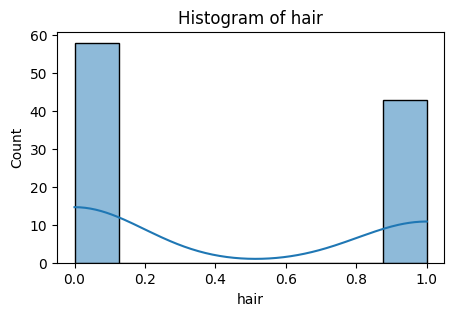

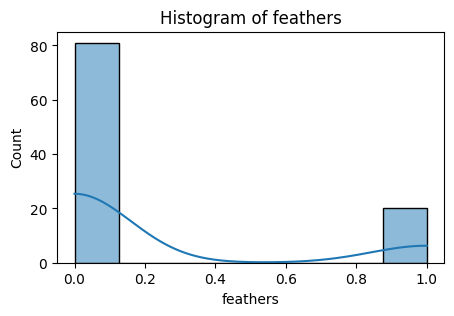

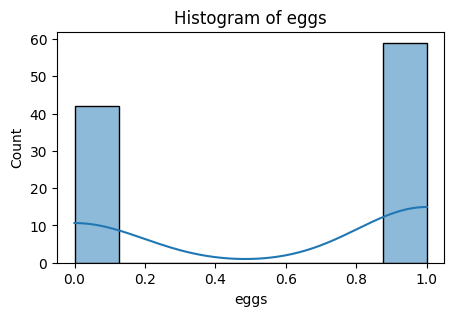

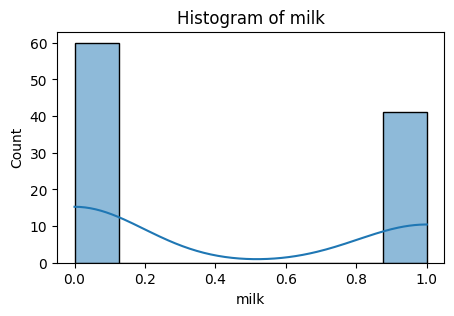

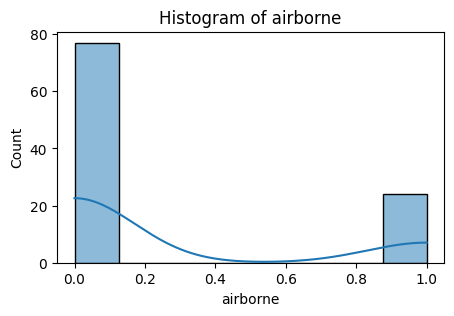

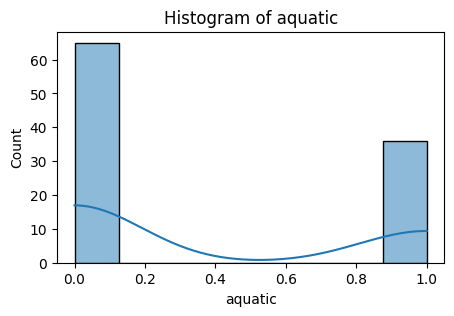

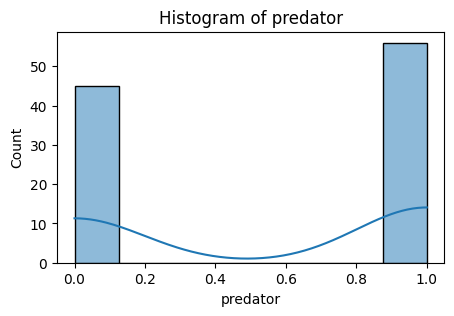

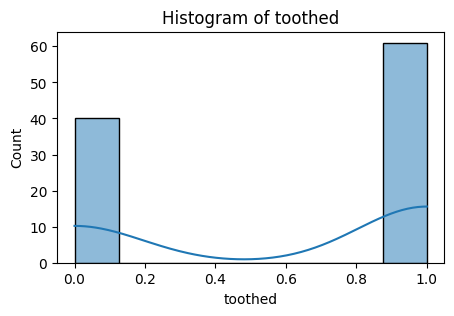

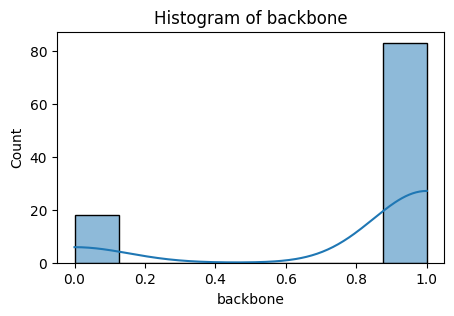

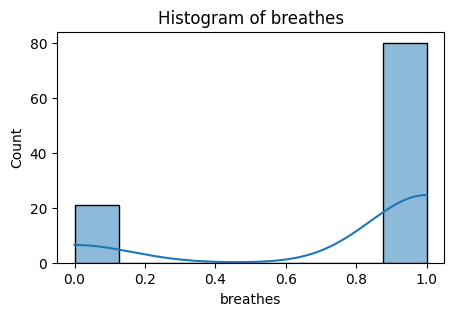

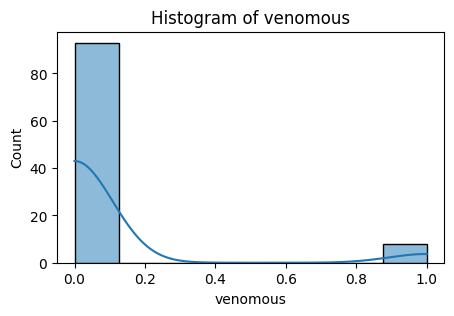

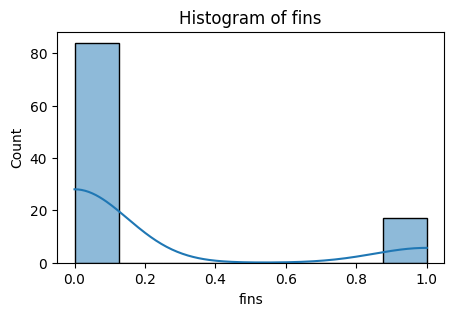

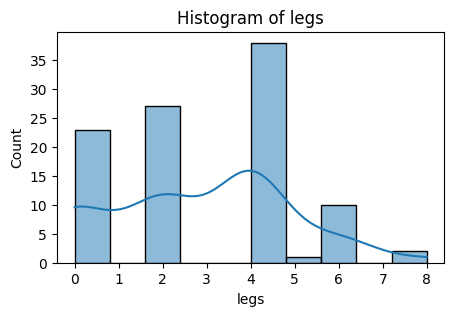

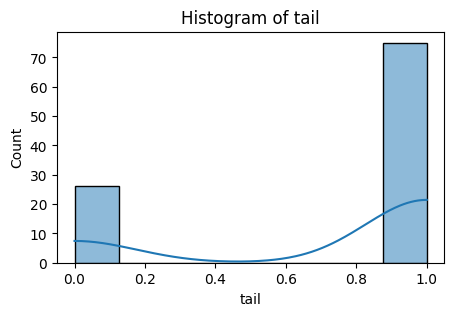

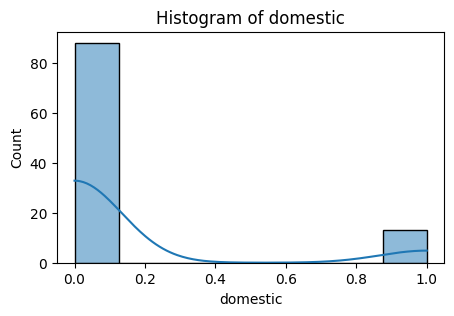

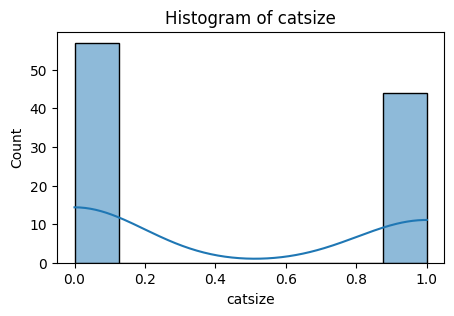

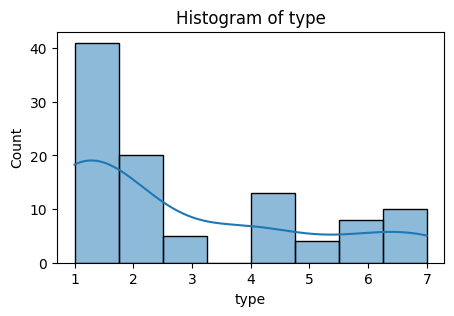

In [46]:
for i in numerical_col:
  plt.figure(figsize=(5,3))
  sns.histplot(df[i], kde=True)
  plt.title(f'Histogram of {i}')
  plt.show()

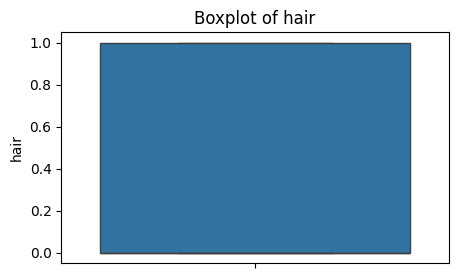

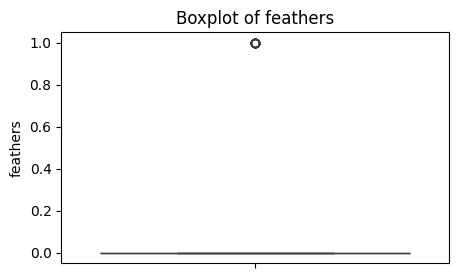

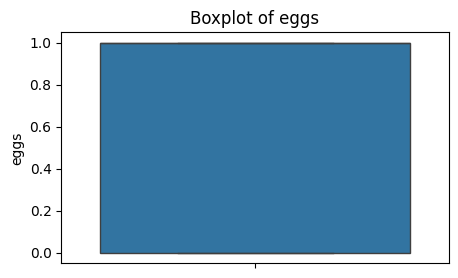

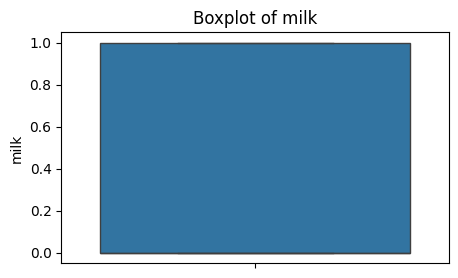

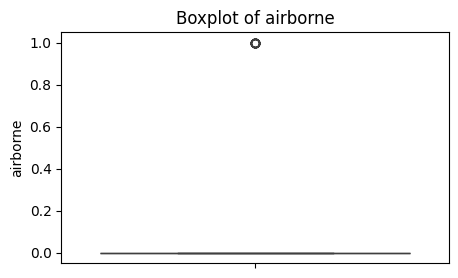

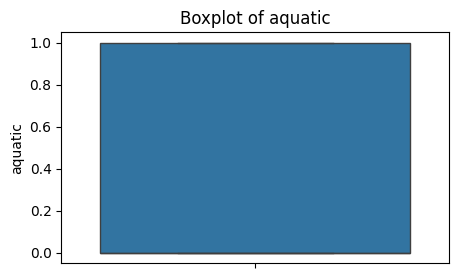

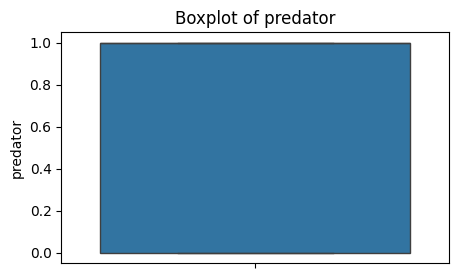

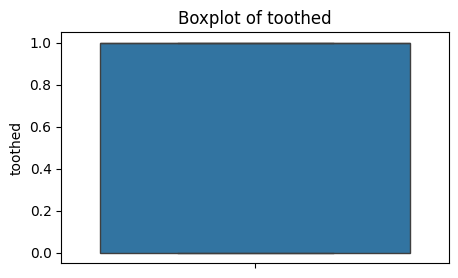

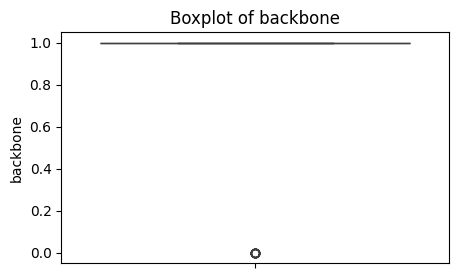

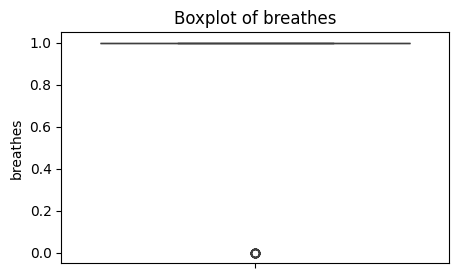

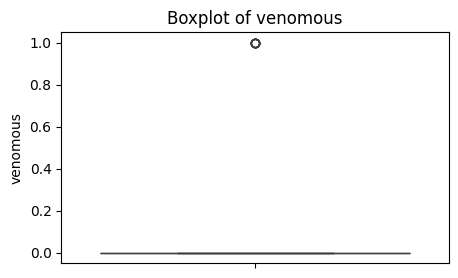

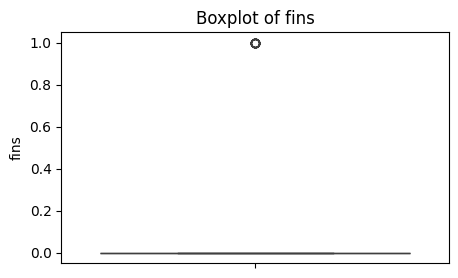

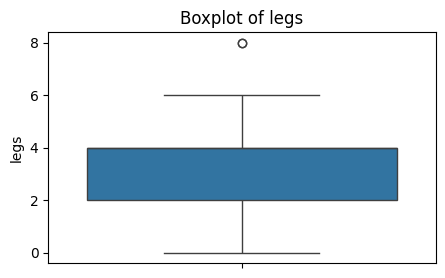

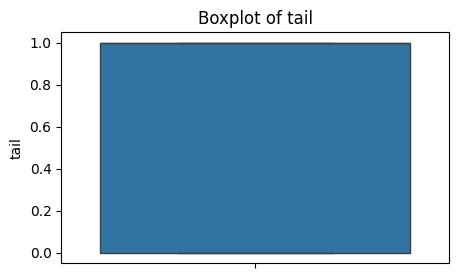

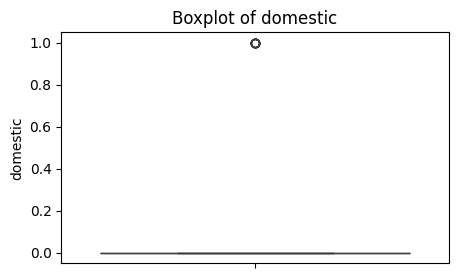

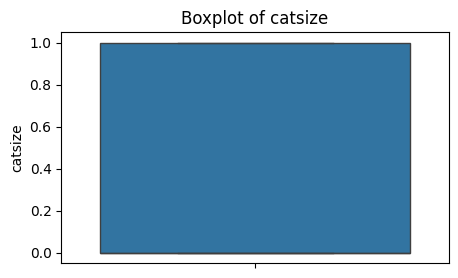

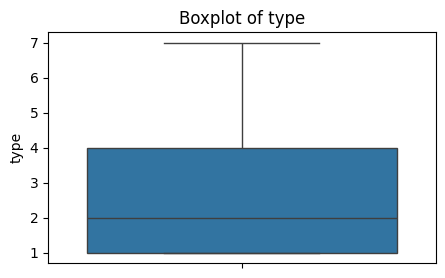

In [47]:
# Detecting Outliers
for i in numerical_col:
  plt.figure(figsize=(5,3))
  sns.boxplot(df[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

In [48]:
df['legs'].value_counts()


,count
legs,
4,38
2,27
0,23
6,10
8,2
5,1


Most of the features in the dataset are binary (0 or 1), so no outliers are present.
The only numerical feature, **“legs”**, shows natural variations like 0, 2, 4, 6, and 8, which are biologically valid.
Hence, **no outlier treatment is required**, except for a single record with 5 legs, which can be optionally corrected.


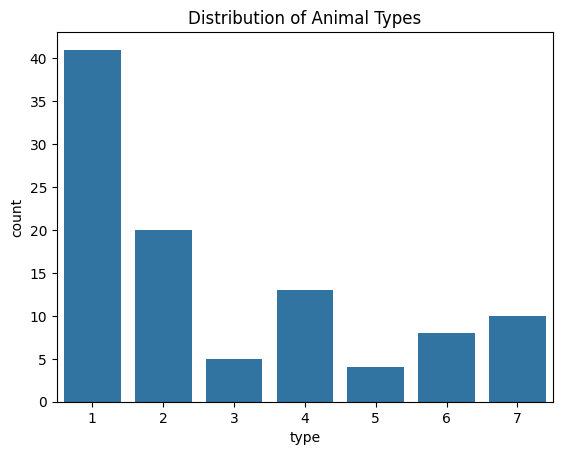

In [49]:
# Check class distribution
sns.countplot(x='type', data=df)
plt.title("Distribution of Animal Types")
plt.show()

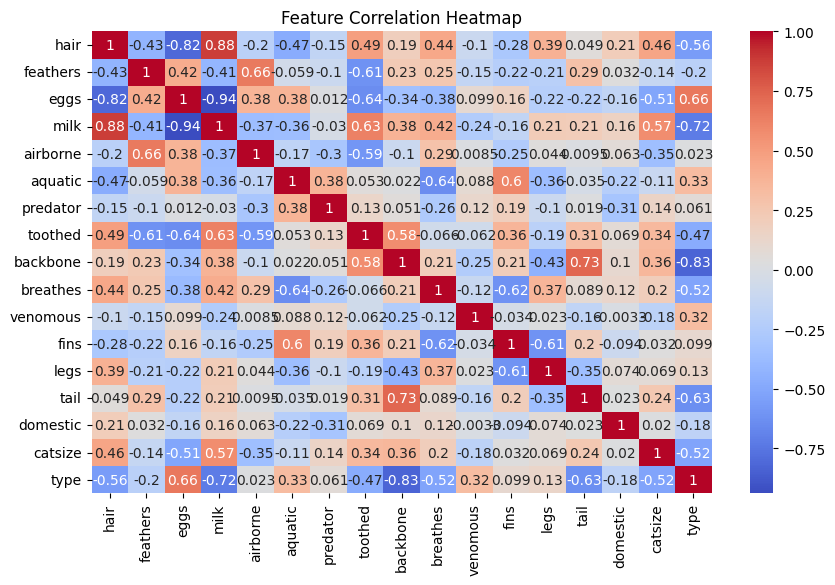

In [50]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

>3. Split the dataset into training and testing sets (80% training, 20% testing).

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Separate features (X) and target (y)
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

>4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN model.
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors.

# Fit the model on training data
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

>5. Choose an appropriate distance metric and value for K.

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create KNN model
knn = KNeighborsClassifier()

# GridSearchCV to find the best parameters
grid= GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Train final model with best parameters
best_knn = grid.best_estimator_

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Best Cross-Validation Accuracy: 0.9625


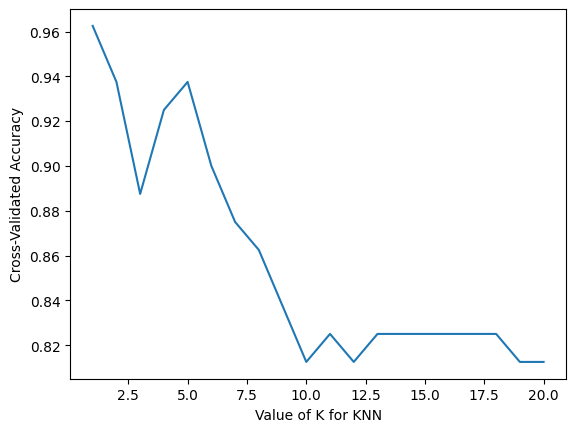

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# choose k between 1 to 20
k_range = range(1, 21)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

>6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data using the best KNN model
y_pred = best_knn.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# Detailed classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



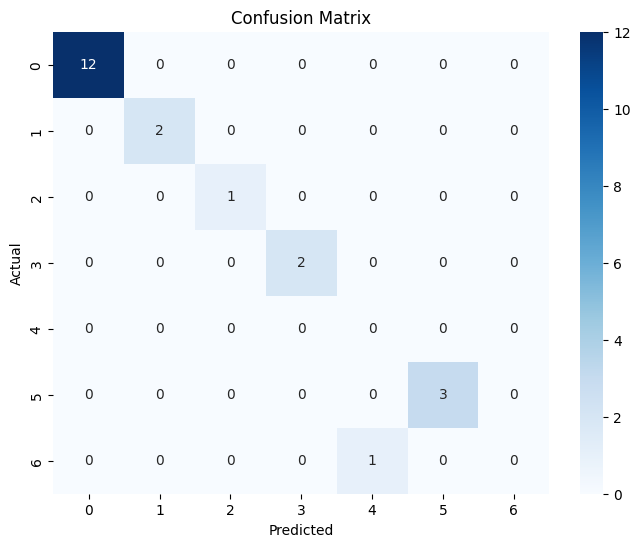

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

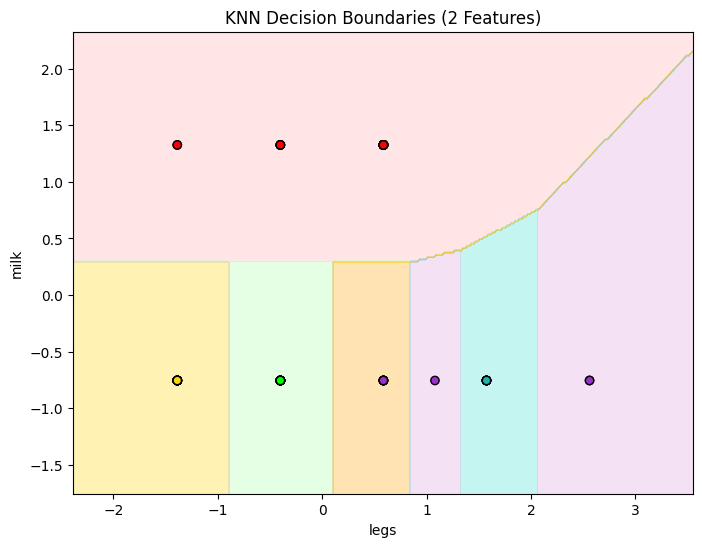

In [58]:
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Select two features for plotting (you can choose any two meaningful ones)
X_plot = X_train_scaled[:, [X.columns.get_loc('legs'), X.columns.get_loc('milk')]]
y_plot = y_train

# Fit KNN on these two features
knn_plot = KNeighborsClassifier(n_neighbors=best_knn.n_neighbors, metric=best_knn.metric)
knn_plot.fit(X_plot, y_plot)

# Create mesh grid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on mesh grid
Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF','#FFD700','#FFA500','#40E0D0','#DDA0DD']))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolor='k', cmap=ListedColormap(['#FF0000','#00FF00','#0000FF','#FFD700','#FF8C00','#20B2AA','#9932CC']))
plt.xlabel('legs')
plt.ylabel('milk')
plt.title("KNN Decision Boundaries (2 Features)")
plt.show()


## **Interview Questions:**

### 1. Key Hyperparameters in KNN:

n_neighbors – Number of nearest data points (K) considered for classification; smaller K → more complex boundary, larger K → smoother decision boundary.

weights – Determines how neighbors influence the result ('uniform' = equal weight, 'distance' = closer neighbors have more impact).

### 2) Distance Metrics used in KNN:

Euclidean Distance – Most common metric, measures straight-line distance between points (used for continuous features).

Manhattan or Minkowski Distance – Measures distance along axes; useful when features have different scales or distributions.